In [1]:
from google.colab import files
uploaded = files.upload()


Saving job_postings_cleaned.csv to job_postings_cleaned.csv
Saving job_skills_normalized.csv to job_skills_normalized.csv
Saving skill_recommendations.csv to skill_recommendations.csv
Saving top_skills_by_role.csv to top_skills_by_role.csv


In [10]:
import pandas as pd

# Load the files
jobs_df = pd.read_csv("job_postings_cleaned.csv")
skills_df = pd.read_csv("job_skills_normalized.csv")
top_skills_df = pd.read_csv("top_skills_by_role.csv")
recommendations_df = pd.read_csv("skill_recommendations.csv")

# Quick check: show first 5 rows of each
print("Jobs data:")
display(jobs_df.head())

print("Normalized Skills data:")
display(skills_df.head())

print("Top Skills by Role data:")
display(top_skills_df.head())

print("Skill Recommendations data:")
display(recommendations_df.head())


Jobs data:


,job_link,job_title,company,job_location,job_level,job_type,job_title_clean
0,https://www.linkedin.com/jobs/view/senior-mach...,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",Mid senior,Onsite,senior machine learning engineer
1,https://www.linkedin.com/jobs/view/principal-s...,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",Mid senior,Onsite,principal software engineer ml accelerators
2,https://www.linkedin.com/jobs/view/senior-etl-...,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",Associate,Onsite,senior etl data warehouse specialist
3,https://www.linkedin.com/jobs/view/senior-data...,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",Mid senior,Onsite,senior data warehouse developer architect
4,https://www.linkedin.com/jobs/view/lead-data-e...,Lead Data Engineer,Dice,"Plano, TX",Mid senior,Onsite,lead data engineer


Normalized Skills data:


,job_link,skill,skill_normalized
0,https://www.linkedin.com/jobs/view/senior-mach...,machine learning,machine learning
1,https://www.linkedin.com/jobs/view/senior-mach...,programming,programming
2,https://www.linkedin.com/jobs/view/senior-mach...,python,python
3,https://www.linkedin.com/jobs/view/senior-mach...,scala,scala
4,https://www.linkedin.com/jobs/view/senior-mach...,java,java


Top Skills by Role data:


,job_title_clean,skill_normalized,count
0,data engineer,sql,210
1,data engineer,data engineering,200
2,data engineer,python,106
3,data engineer,aws,95
4,data engineer,azure,87


Skill Recommendations data:


,role,recommended_skill,priority,market_demand
0,data engineer,data engineering,High,200
1,data engineer,aws,High,95
2,data engineer,azure,High,87
3,data engineer,spark,High,66
4,data engineer,data modeling,High,50


In [11]:
# Check the shape (rows, columns) and info of each dataset
print("Jobs dataset shape and info:")
print(jobs_df.shape)
display(jobs_df.info())

print("\nNormalized Skills dataset shape and info:")
print(skills_df.shape)
display(skills_df.info())

print("\nTop Skills by Role dataset shape and info:")
print(top_skills_df.shape)
display(top_skills_df.info())

print("\nSkill Recommendations dataset shape and info:")
print(recommendations_df.shape)
display(recommendations_df.info())


Jobs dataset shape and info:
(12217, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_link         12217 non-null  object
 1   job_title        12217 non-null  object
 2   company          12217 non-null  object
 3   job_location     12216 non-null  object
 4   job_level        12217 non-null  object
 5   job_type         12217 non-null  object
 6   job_title_clean  12217 non-null  object
dtypes: object(7)
memory usage: 668.2+ KB


None


Normalized Skills dataset shape and info:
(314950, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314950 entries, 0 to 314949
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   job_link          314950 non-null  object
 1   skill             314950 non-null  object
 2   skill_normalized  314950 non-null  object
dtypes: object(3)
memory usage: 7.2+ MB


None


Top Skills by Role dataset shape and info:
(2989, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2989 entries, 0 to 2988
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title_clean   2989 non-null   object
 1   skill_normalized  2989 non-null   object
 2   count             2989 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 70.2+ KB


None


Skill Recommendations dataset shape and info:
(18, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   role               18 non-null     object
 1   recommended_skill  18 non-null     object
 2   priority           18 non-null     object
 3   market_demand      18 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 708.0+ bytes


None

In [12]:
# --- Jobs dataset summary ---
print("Jobs Dataset Summary:")
print("Unique job titles:", jobs_df['job_title_clean'].nunique())
print("Unique companies:", jobs_df['company'].nunique())
print("Unique job locations:", jobs_df['job_location'].nunique())
print("\nTop 5 job titles:")
display(jobs_df['job_title_clean'].value_counts().head())

# --- Normalized Skills dataset summary ---
print("\nNormalized Skills Summary:")
print("Unique skills:", skills_df['skill_normalized'].nunique())
print("Unique job links:", skills_df['job_link'].nunique())
print("\nTop 10 skills overall:")
display(skills_df['skill_normalized'].value_counts().head(10))

# --- Top Skills by Role summary ---
print("\nTop Skills by Role Summary:")
display(top_skills_df.groupby('job_title_clean')['skill_normalized'].count().sort_values(ascending=False).head(10))

# --- Skill Recommendations summary ---
print("\nSkill Recommendations Summary:")
display(recommendations_df)


Jobs Dataset Summary:
Unique job titles: 6322
Unique companies: 3947
Unique job locations: 2049

Top 5 job titles:


,count
job_title_clean,
senior data engineer,308
senior data analyst,189
data engineer,150
senior data scientist,141
data analyst,140



Normalized Skills Summary:
Unique skills: 61110
Unique job links: 12212

Top 10 skills overall:


,count
skill_normalized,
sql,9300
machine learning,5807
python,5210
data engineering,4619
aws,3586
data analysis,3293
azure,2705
communication,2506
data visualization,2330



Top Skills by Role Summary:


,skill_normalized
job_title_clean,
data scientist,1268
data engineer,1266
machine learning engineer,455



Skill Recommendations Summary:


,role,recommended_skill,priority,market_demand
0,data engineer,data engineering,High,200
1,data engineer,aws,High,95
2,data engineer,azure,High,87
3,data engineer,spark,High,66
4,data engineer,data modeling,High,50
5,data engineer,data warehousing,Medium,42
6,data engineer,data analysis,Medium,39
7,data engineer,java,Medium,37
8,data engineer,machine learning,Medium,32
9,data engineer,data quality,Medium,28


In [15]:
import pandas as pd

# Load Top Skills by Role CSV
top_skills_role_df = pd.read_csv("top_skills_by_role.csv")

# Quick check
top_skills_role_df.head()


,job_title_clean,skill_normalized,count
0,data engineer,sql,210
1,data engineer,data engineering,200
2,data engineer,python,106
3,data engineer,aws,95
4,data engineer,azure,87


/tmp/ipython-input-1077940596.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='magma')


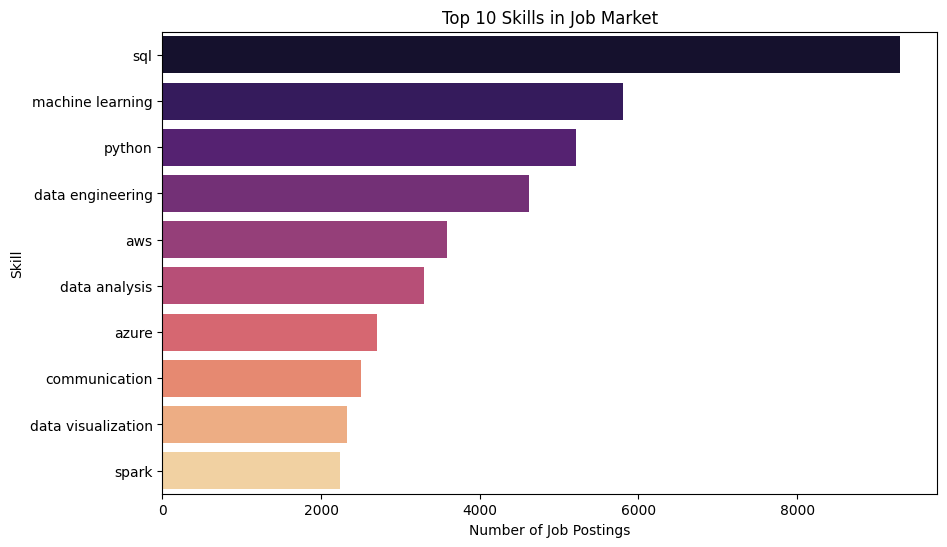

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 skills overall
top_skills = skills_df['skill_normalized'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette='magma')
plt.title("Top 10 Skills in Job Market")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skill")
plt.show()


/tmp/ipython-input-723399237.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_skills['count'].head(10),


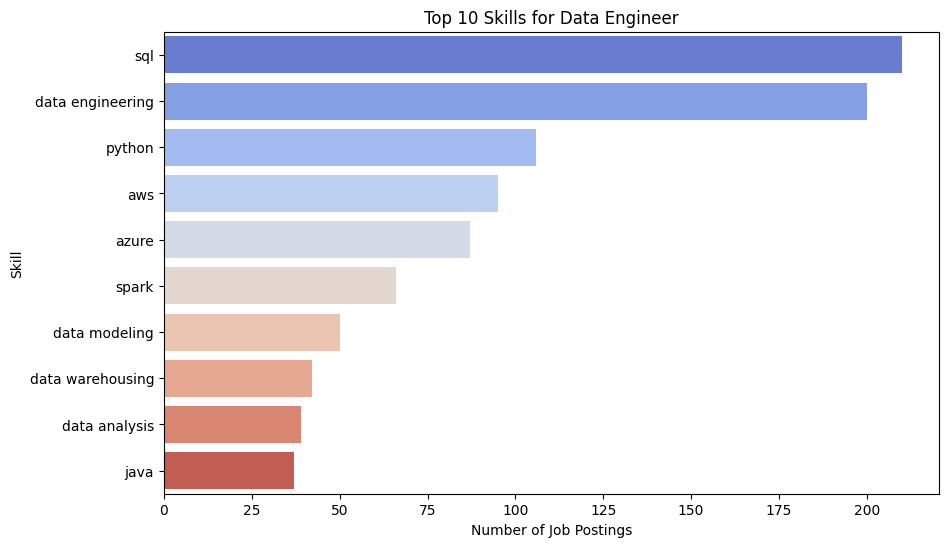

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a role
role = "data engineer"

# Filter top skills for this role
role_skills = top_skills_role_df[top_skills_role_df['job_title_clean'] == role]

# Sort by count descending
role_skills = role_skills.sort_values('count', ascending=False)

# Plot top 10 skills for the role
plt.figure(figsize=(10,6))
sns.barplot(x=role_skills['count'].head(10),
            y=role_skills['skill_normalized'].head(10),
            palette='coolwarm')
plt.title(f"Top 10 Skills for {role.title()}")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skill")
plt.show()


In [17]:
# Example candidate skills (comma-separated)
candidate_skills_input = "Python, SQL, AWS, Data Engineering"

# Convert to lowercase and strip whitespace
candidate_skills = [skill.strip().lower() for skill in candidate_skills_input.split(",")]

# Display candidate skills
print("Candidate Skills:", candidate_skills)


Candidate Skills: ['python', 'sql', 'aws', 'data engineering']


In [18]:
# Role top skills (from the filtered DataFrame)
role_top_skills = role_skills['skill_normalized'].str.lower().tolist()

# Matched skills
matched_skills = [skill for skill in role_top_skills if skill in candidate_skills]

# Missing skills
missing_skills = [skill for skill in role_top_skills if skill not in candidate_skills]

# Display results
print("Matched Skills:", matched_skills)
print("Missing Skills:", missing_skills)


Matched Skills: ['sql', 'data engineering', 'python', 'aws']
Missing Skills: ['azure', 'spark', 'data modeling', 'data warehousing', 'data analysis', 'java', 'machine learning', 'data quality', 'data integration', 'snowflake', 'gcp', 'scala', 'data visualization', 'tableau', 'data governance', 'kafka', 'redshift', 'data transformation', 'hadoop', 'jenkins', 'data analytics', 'data architecture', 'communication skills', 'communication', 'data security', 'databricks', 'devops', 'analytical skills', 'big data', 'cloud computing', 'collaboration', 'lambda', 's3', 'power bi', 'kubernetes', 'data storage', 'analytics', 'business intelligence', 'data processing', 'data science', 'hive', 'rds', 'git', 'troubleshooting', 'problemsolving skills', 'github', 'teamwork', 'software development', 'r', 'problemsolving', 'oracle', 'ec2', 'docker', 'data integrity', 'computer science', 'agile', 'agile development', 'data extraction', 'data modelling', 'emr', 'mongodb', 'nifi', 'powerbi', 'terraform', 'e

In [19]:
# Total top skills for the role
total_skills = len(role_top_skills)

# Number of matched skills
matched_count = len(matched_skills)

# Skill gap percentage
skill_gap_percent = (1 - matched_count / total_skills) * 100

print(f"Total Top Skills for {role.title()}: {total_skills}")
print(f"Matched Skills: {matched_count}")
print(f"Skill Gap: {skill_gap_percent:.2f}%")


Total Top Skills for Data Engineer: 1266
Matched Skills: 4
Skill Gap: 99.68%


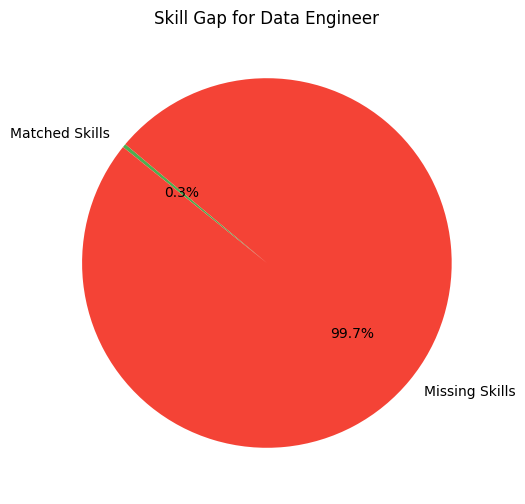

In [20]:
import matplotlib.pyplot as plt

matched_count = len(matched_skills)
missing_count = len(missing_skills)

plt.figure(figsize=(8,6))
plt.pie([matched_count, missing_count],
        labels=['Matched Skills', 'Missing Skills'],
        colors=['#4CAF50','#F44336'],
        autopct='%1.1f%%', startangle=140)
plt.title(f"Skill Gap for {role.title()}")
plt.show()


In [23]:
from google.colab import files
import pandas as pd

# Upload CSV
uploaded = files.upload()

# Read the uploaded CSV into a DataFrame
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    skill_recommendations_df = pd.read_csv(filename)

# Check the first few rows
skill_recommendations_df.head()


Saving skill_recommendations.csv to skill_recommendations (1).csv
Uploaded file: skill_recommendations (1).csv


,role,recommended_skill,priority,market_demand
0,data engineer,data engineering,High,200
1,data engineer,aws,High,95
2,data engineer,azure,High,87
3,data engineer,spark,High,66
4,data engineer,data modeling,High,50


In [24]:
import pandas as pd

# Read the uploaded CSV
skill_recommendations_df = pd.read_csv("skill_recommendations (1).csv")

# Preview the first few rows
skill_recommendations_df.head()


,role,recommended_skill,priority,market_demand
0,data engineer,data engineering,High,200
1,data engineer,aws,High,95
2,data engineer,azure,High,87
3,data engineer,spark,High,66
4,data engineer,data modeling,High,50


In [25]:
# Candidate's missing skills
missing_skills_list = missing_skills  # From previous skill gap step

# Filter recommendations for the role
role = "data engineer"
role_recommendations = skill_recommendations_df[
    (skill_recommendations_df['role'].str.lower() == role.lower()) &
    (skill_recommendations_df['recommended_skill'].isin(missing_skills_list))
]

# Sort by priority and market demand
priority_order = {'High': 1, 'Medium': 2, 'Low': 3}
role_recommendations['priority_order'] = role_recommendations['priority'].map(priority_order)
role_recommendations = role_recommendations.sort_values(['priority_order', 'market_demand'], ascending=[True, False])

# Display roadmap
role_recommendations[['recommended_skill', 'priority', 'market_demand']]


/tmp/ipython-input-3689522212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  role_recommendations['priority_order'] = role_recommendations['priority'].map(priority_order)


,recommended_skill,priority,market_demand
2,azure,High,87
3,spark,High,66
4,data modeling,High,50
5,data warehousing,Medium,42
6,data analysis,Medium,39
7,java,Medium,37
8,machine learning,Medium,32
9,data quality,Medium,28
10,data integration,Low,26
11,snowflake,Low,26


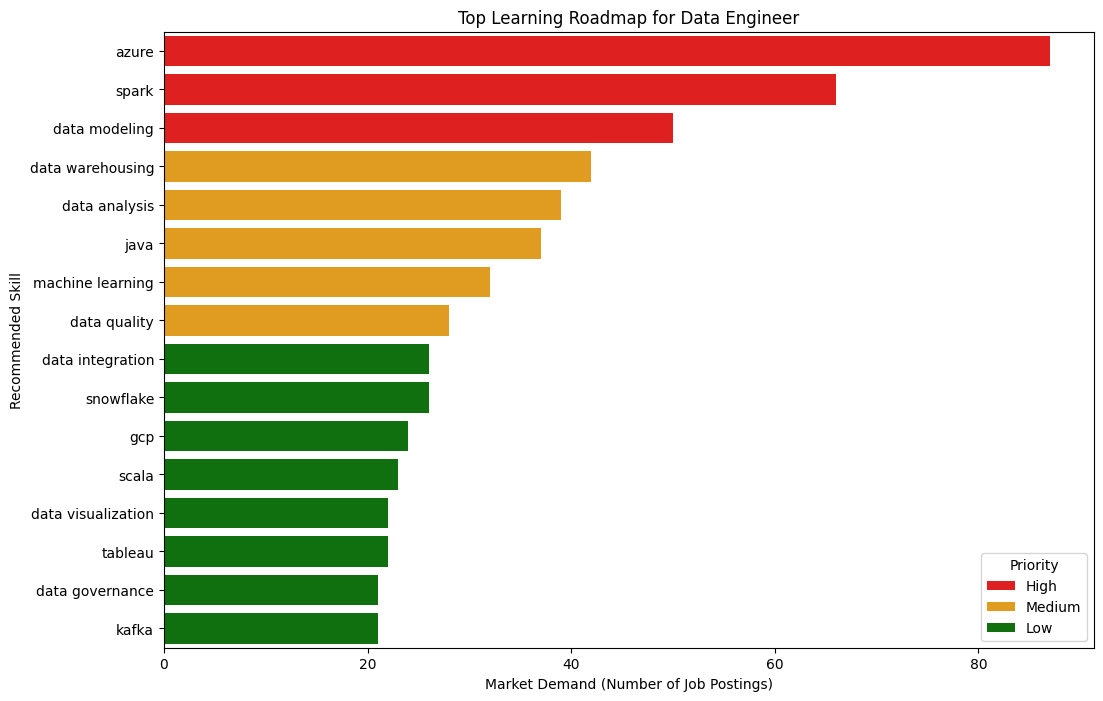

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.barplot(
    x='market_demand',
    y='recommended_skill',
    data=role_recommendations.head(20),  # Top 20 recommended skills
    hue='priority',
    dodge=False,
    palette={'High':'red','Medium':'orange','Low':'green'}
)
plt.title(f"Top Learning Roadmap for {role.title()}")
plt.xlabel("Market Demand (Number of Job Postings)")
plt.ylabel("Recommended Skill")
plt.legend(title='Priority')
plt.show()


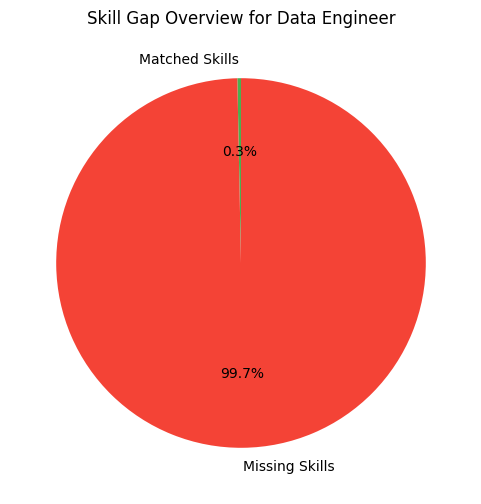

In [27]:
# Skill counts
matched_count = len(matched_skills)
missing_count = len(missing_skills)

plt.figure(figsize=(6,6))
plt.pie(
    [matched_count, missing_count],
    labels=['Matched Skills', 'Missing Skills'],
    autopct='%1.1f%%',
    colors=['#4CAF50','#F44336'],  # Green for matched, Red for missing
    startangle=90
)
plt.title(f"Skill Gap Overview for {role.title()}")
plt.show()


In [28]:
# Ensure we work on a clean copy (avoid warnings)
roadmap_df = role_recommendations.copy()

# Remove skills the candidate already has
roadmap_df = roadmap_df[~roadmap_df['recommended_skill'].isin(matched_skills)]

# Priority ranking
priority_order = {'High': 1, 'Medium': 2, 'Low': 3}
roadmap_df['priority_rank'] = roadmap_df['priority'].map(priority_order)

# Sort roadmap
roadmap_df = roadmap_df.sort_values(
    by=['priority_rank', 'market_demand'],
    ascending=[True, False]
)

# Final roadmap view
final_roadmap = roadmap_df[['recommended_skill', 'priority', 'market_demand']]

final_roadmap


,recommended_skill,priority,market_demand
2,azure,High,87
3,spark,High,66
4,data modeling,High,50
5,data warehousing,Medium,42
6,data analysis,Medium,39
7,java,Medium,37
8,machine learning,Medium,32
9,data quality,Medium,28
10,data integration,Low,26
11,snowflake,Low,26


# Data Engineer Skill Gap Analysis

**Candidate Skills:** Python, SQL, AWS, Data Engineering  
**Role:** Data Engineer  

**Total Skills for Role:** 1266  
**Matched Skills:** 4  
**Skill Gap:** 99.68%

## Key Insights
- Candidate has very few of the top in-demand skills.
- High priority skills missing: Azure, Spark, Data Modeling
- Medium and low priority skills can be scheduled next for learning.
- Roadmap provides a clear **step-by-step skill learning plan**.

## Recommendation
1. Focus on **High priority skills** first
2. Then tackle **Medium priority skills**
3. Finish with **Low priority skills**
